
# Student Performance Evaluater

## Steps we will follow in this project

1. Problem understanding

2. collecting data

3. Exploring the data

4. Preprocessing of the data

5. Training the model on the data

6. Evaluating the models performance

7. Choosing the best model 
8. </p>


# 1) Problem Statement
/* The aim of the project is analyze the performance of the student on base of variables such as 
marks in different subjects, attendance and age. We have a dataset containing information about students like their name, marks in different subjects (marks_maths, marks_english), attendance

# 2) Data collection
Dataset Source -  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

the data contained 1000 rows and 8 columns

# 2.1 Importing important libraries  

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

# 2.2 Loading the data

In [3]:
df=pd.read_csv('data/stud.csv')

# 2.3 Exploring the data

## showing some od the data

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the data

In [5]:
df.shape

(1000, 8)

## Missing values checking

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

we don't have any missing value to deal with

## Looking for duplicate values 

In [7]:
df.duplicated().sum()

0

No duplicated values

## gaining some basic info about data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The dataset contains columns of both numerical and catagorical types

In [9]:
## Checking the statistics of the numerical columns

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## checking the unique values for column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Showing catagoriws for each categorical columns

In [12]:
print("the categories in 'gender' is : ", df['gender'].unique())
print("the categories in 'race_ethnicity' is : ", df['race_ethnicity'].unique())
print("the categories in 'parental_level_of_education' is : ", df['parental_level_of_education'].unique())
print("the categories in 'lunch' is : ", df['lunch'].unique())
print("the categories in 'test_preparation_course' is : ", df['test_preparation_course'].unique())


the categories in 'gender' is :  ['female' 'male']
the categories in 'race_ethnicity' is :  ['group B' 'group C' 'group A' 'group D' 'group E']
the categories in 'parental_level_of_education' is :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
the categories in 'lunch' is :  ['standard' 'free/reduced']
the categories in 'test_preparation_course' is :  ['none' 'completed']


## Showing Numerical and Categorical columns

In [13]:
numerical_Col=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_col=[feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical columns {}'.format(len(numerical_Col),numerical_Col))
print("we have {} categorical columns {}".format(len(categorical_col),categorical_col))

we have 3 numerical columns ['math_score', 'reading_score', 'writing_score']
we have 5 categorical columns ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding new columns to the existing data i.e 'total_score' and 'avg_score'

In [14]:
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [15]:
df['avg_score']=(df['math_score'] + df['reading_score'] + df['writing_score'])/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## finding the numbers of students for each score who obtained full marks 

In [16]:
reading_score=df[df['reading_score']==100]['avg_score'].count()
writing_score=df[df['writing_score']==100]['avg_score'].count()
math_score=df[df['math_score']==100]['avg_score'].count()

print("Total numbers of sudents who got full marks in ' reading ' is : {} ".format(reading_score))
print("Total numbers of sudents who got full marks in ' writing ' is :  {}".format(writing_score))
print("Total numbers of sudents who got full marks in ' math ' is :  {}".format(math_score))

Total numbers of sudents who got full marks in ' reading ' is : 17 
Total numbers of sudents who got full marks in ' writing ' is :  14
Total numbers of sudents who got full marks in ' math ' is :  7


# 2.4 Visualization

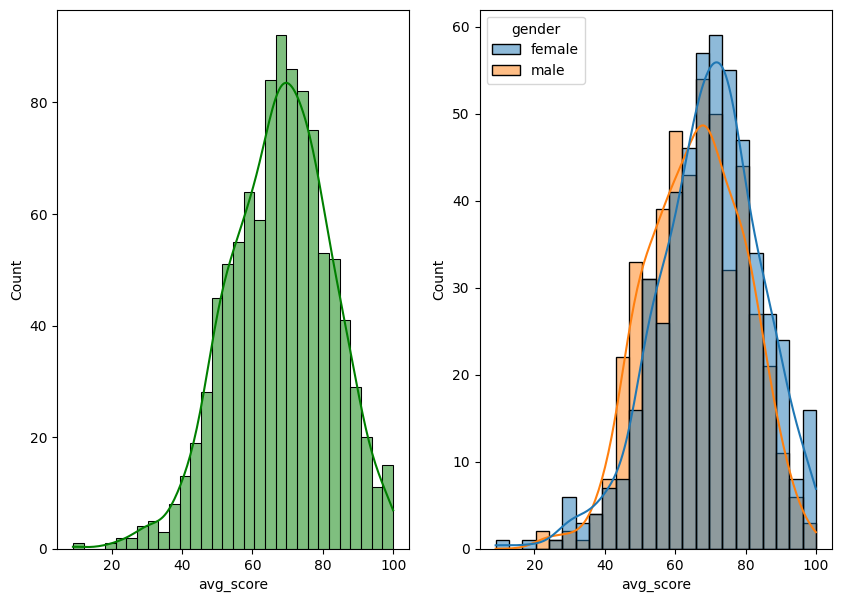

In [17]:
fig , axs =plt.subplots(1,2, figsize=(10,7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()

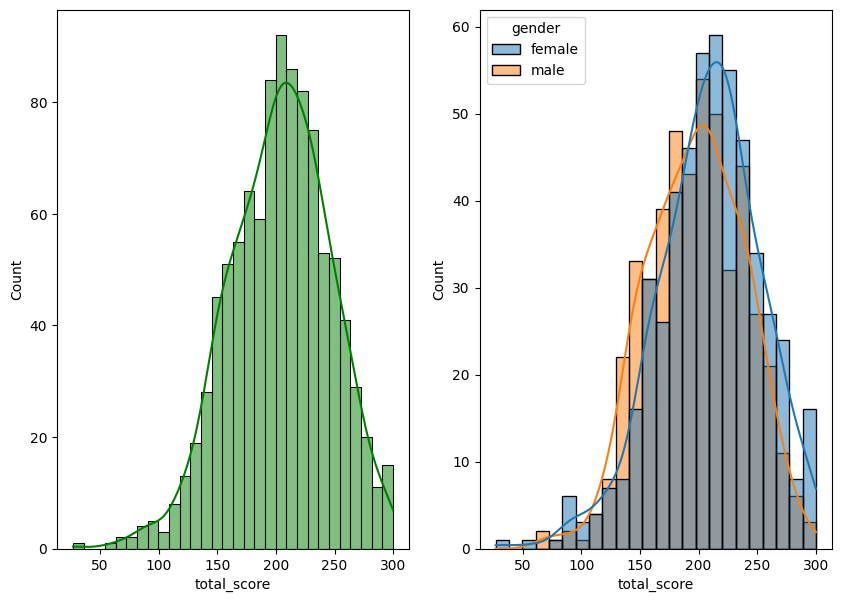

In [18]:
fig , axs =plt.subplots(1,2, figsize=(10,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

from visuals we can see that female has better performance than male

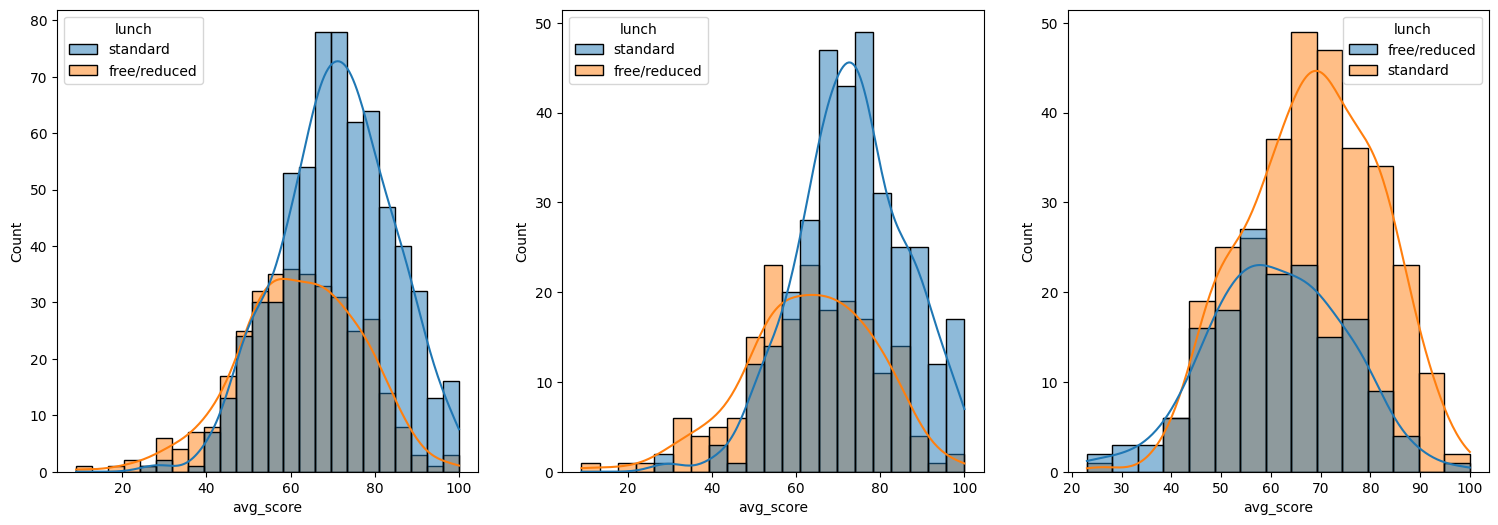

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.show()

from visualz it is clear that standard lunch help to perform better in bot male and female

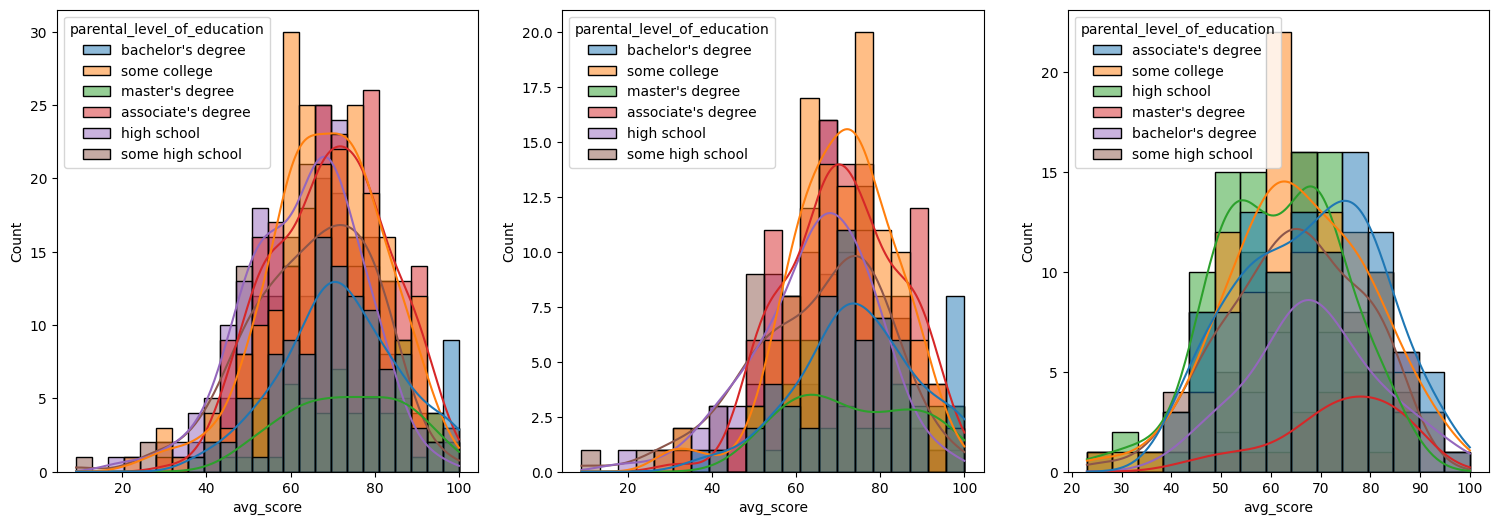

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.show()

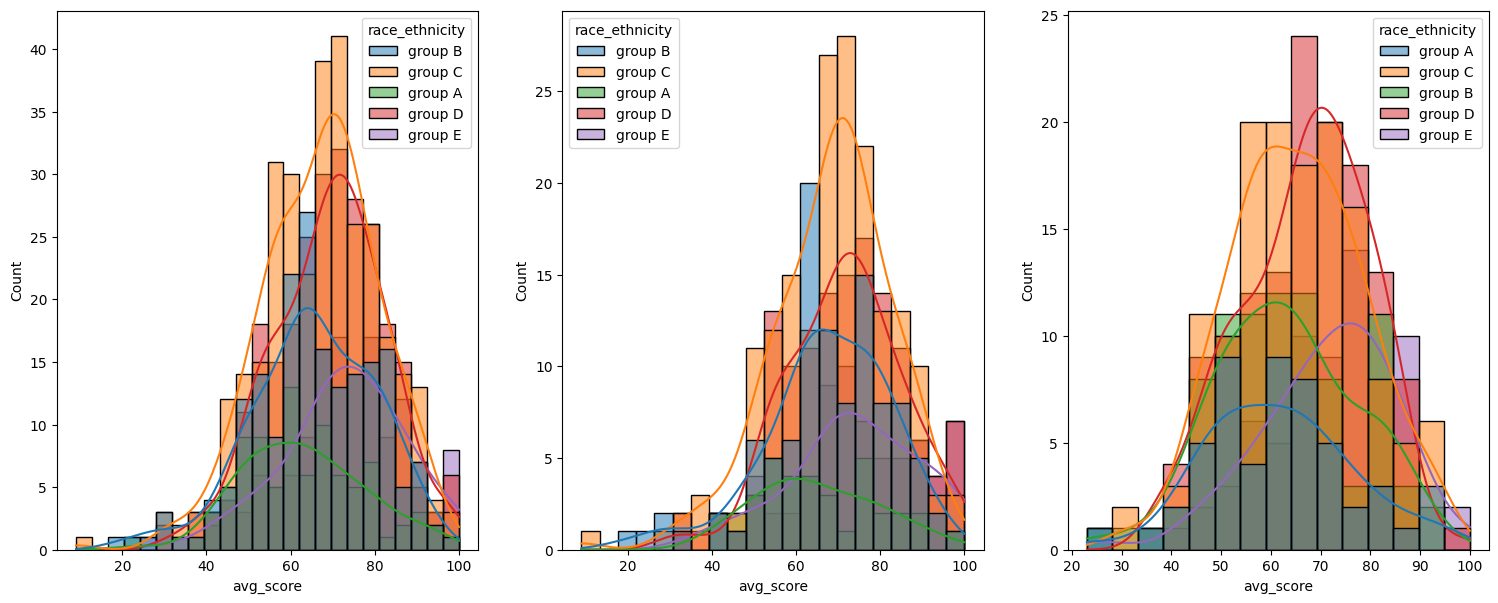

In [21]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')
plt.show()

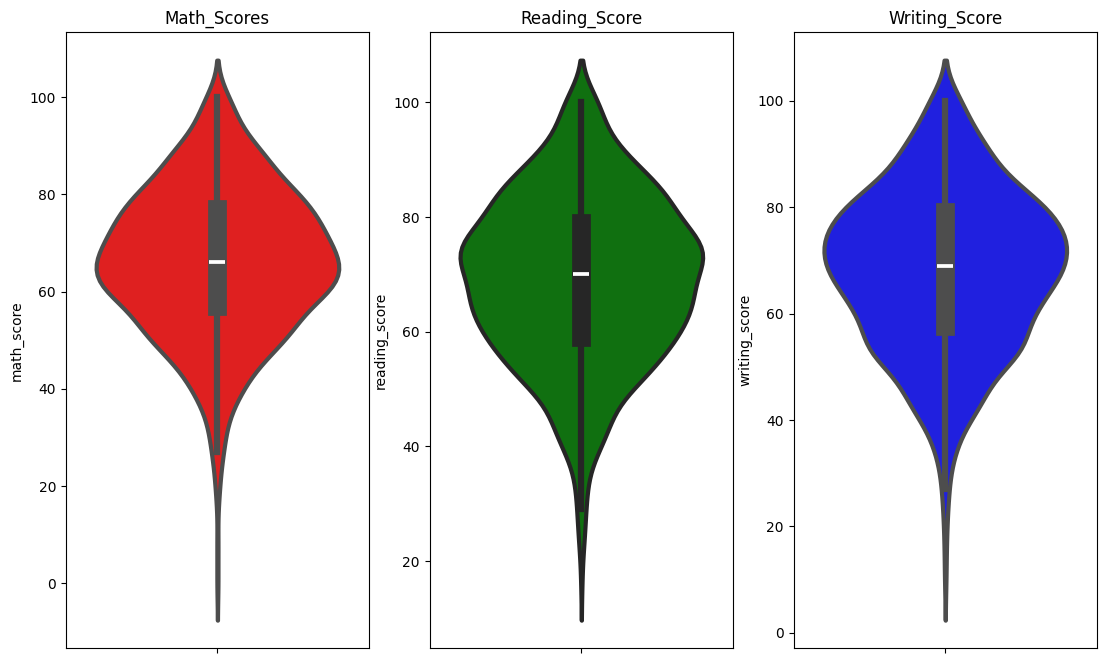

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math_Scores")
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading_Score')
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing_Score")
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)
plt.show()

Math Score has most of the students are between 60 and 80 percent

and other have in between 50 and 80 percent

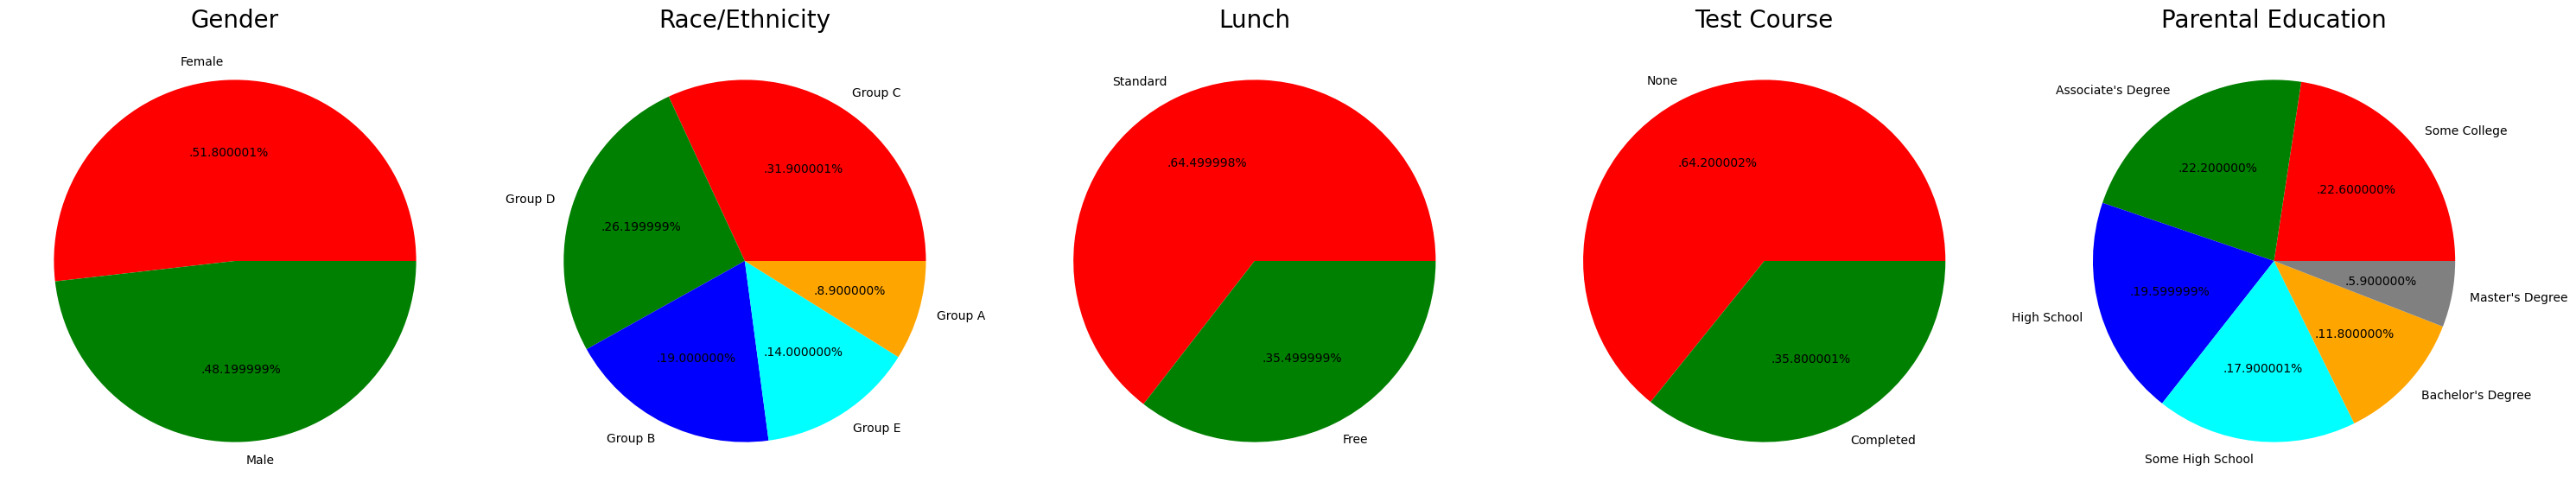

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

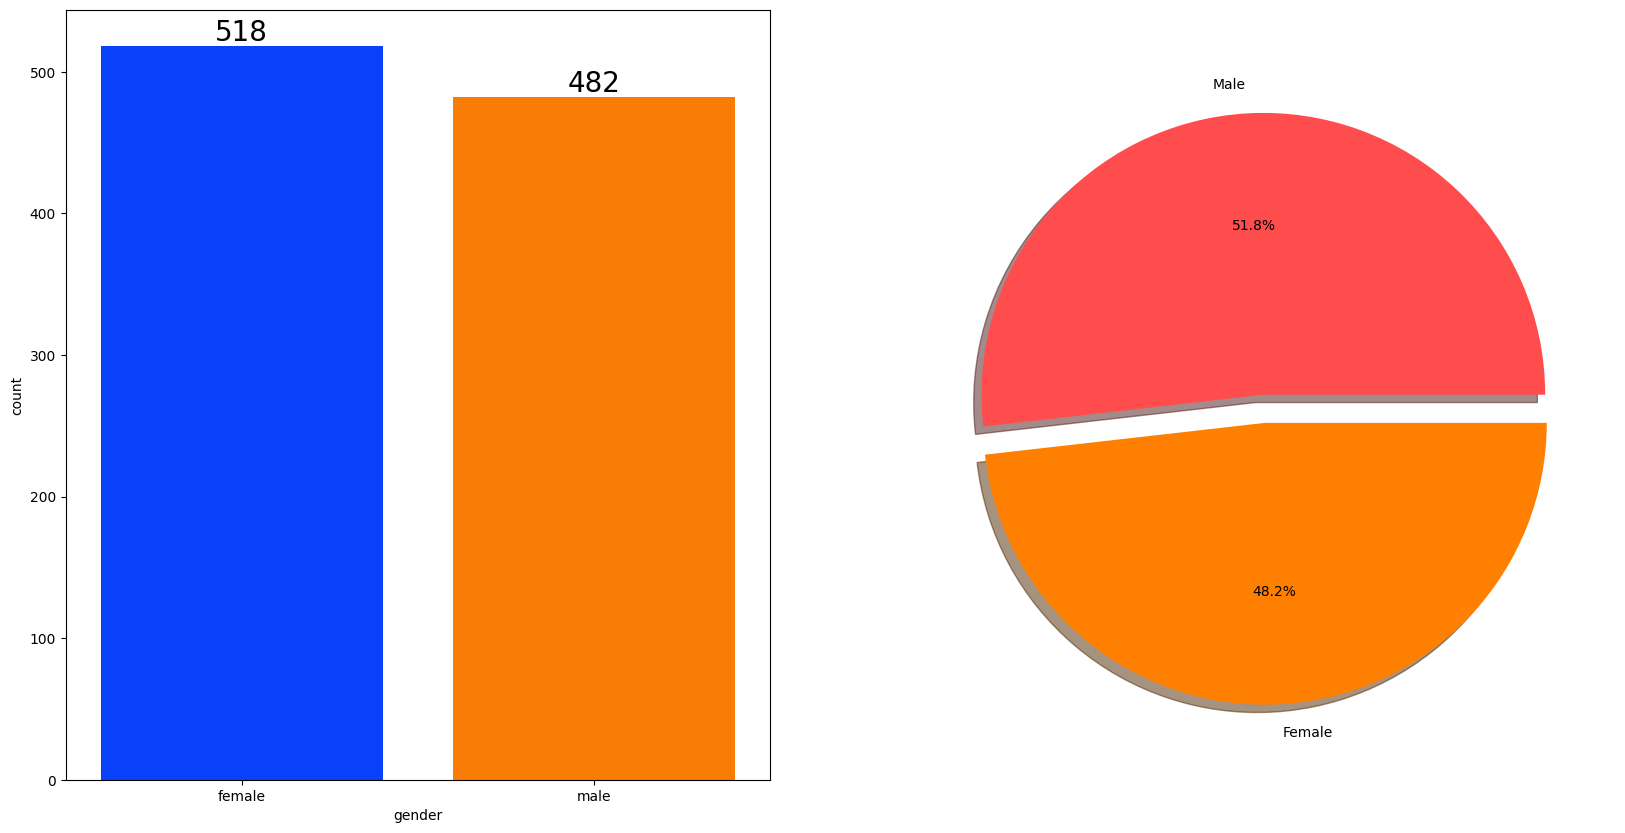

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [25]:
gender_group_math = df.groupby('gender')['math_score'].mean()
print(gender_group_math)
gender_group_read = df.groupby('gender')['reading_score'].mean()
print(gender_group_read)
gender_group_write = df.groupby('gender')['writing_score'].mean()
print(gender_group_write)

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64
gender
female    72.608108
male      65.473029
Name: reading_score, dtype: float64
gender
female    72.467181
male      63.311203
Name: writing_score, dtype: float64


in Math Male has got better average as compared to Female but in others Female perform better than Male

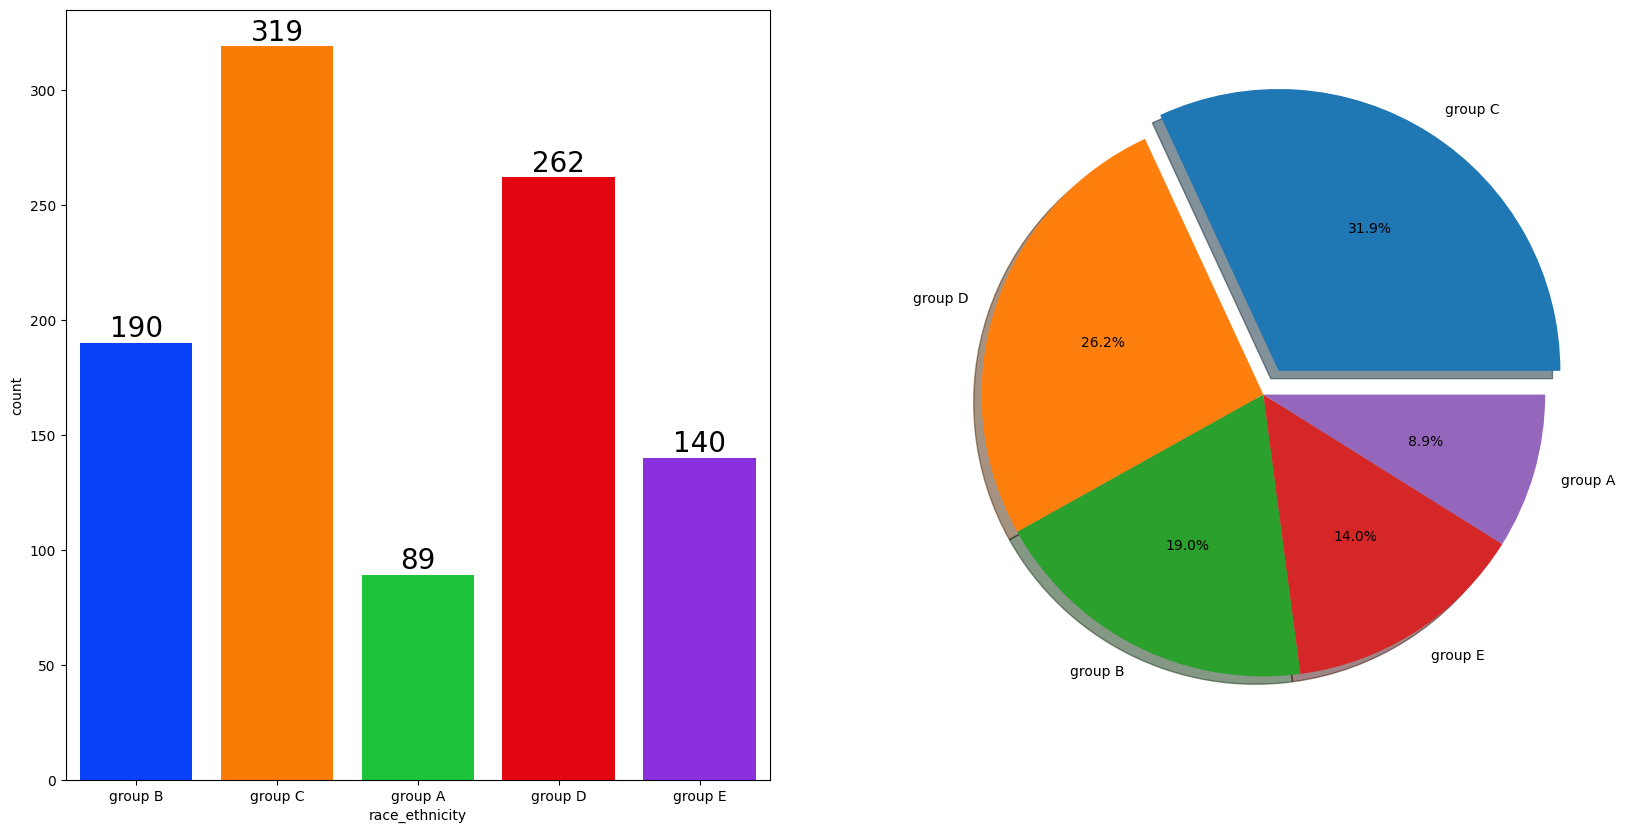

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Group C has the highst numbers of the students

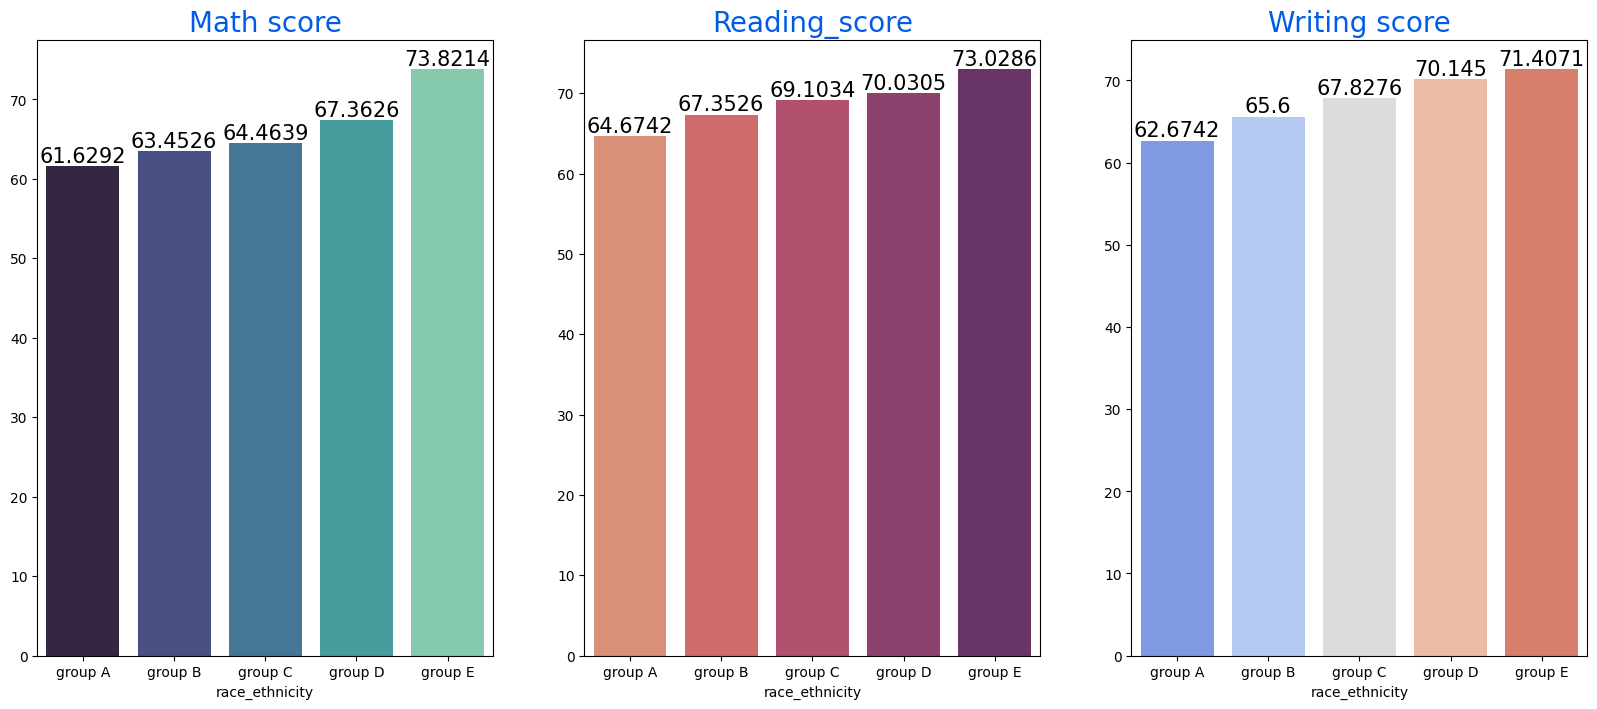

In [27]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

from graph it is clear that Group E has overall better performance than other

In [28]:
x=Group_data2['math_score'].mean().index
x

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race_ethnicity')

In [29]:
y=Group_data2['math_score'].mean().values
y

array([61.62921348, 63.45263158, 64.46394984, 67.36259542, 73.82142857])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   avg_score                    1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


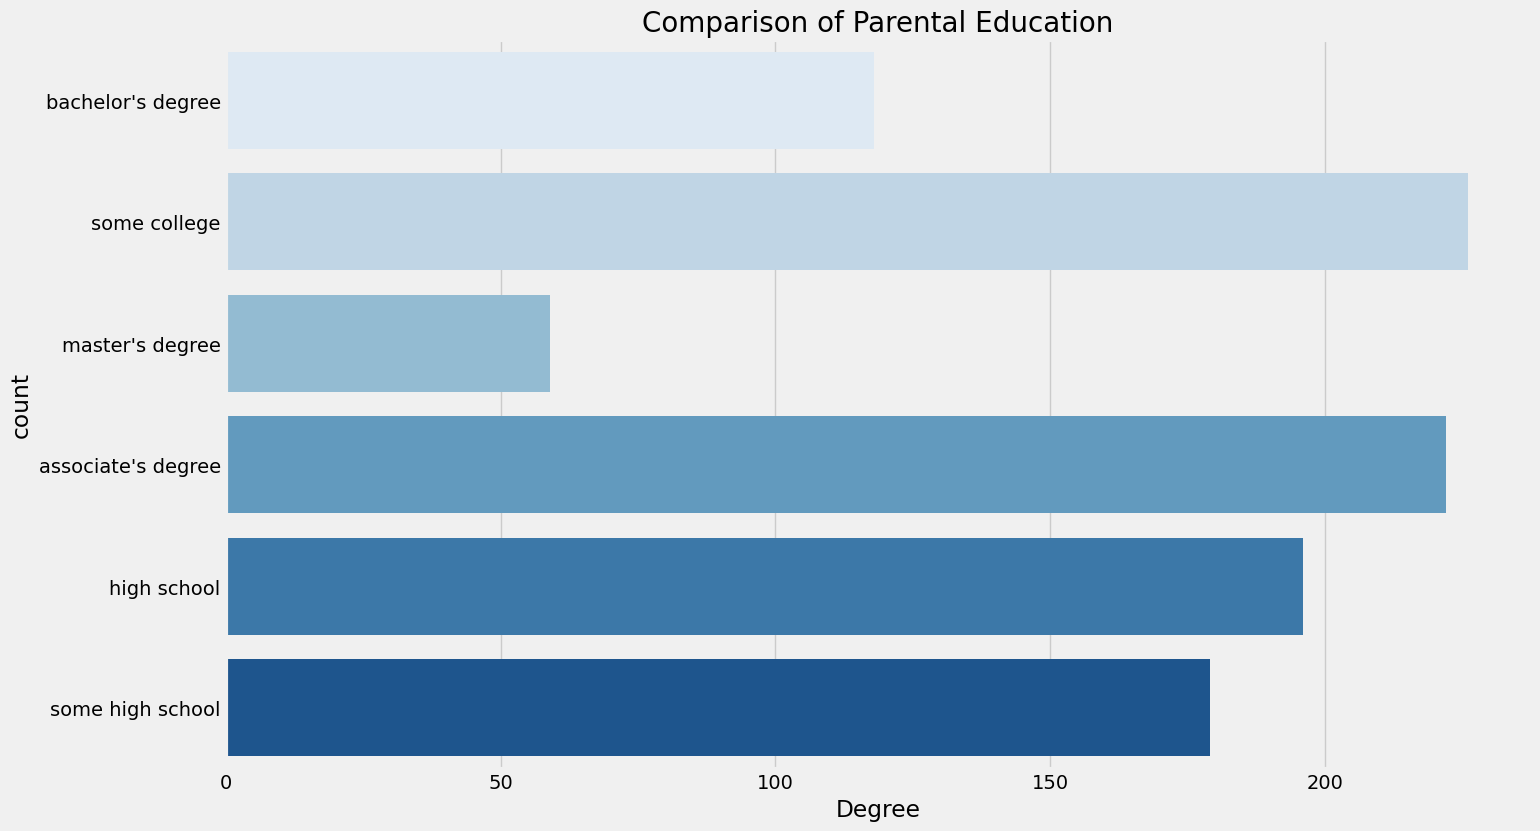

In [31]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

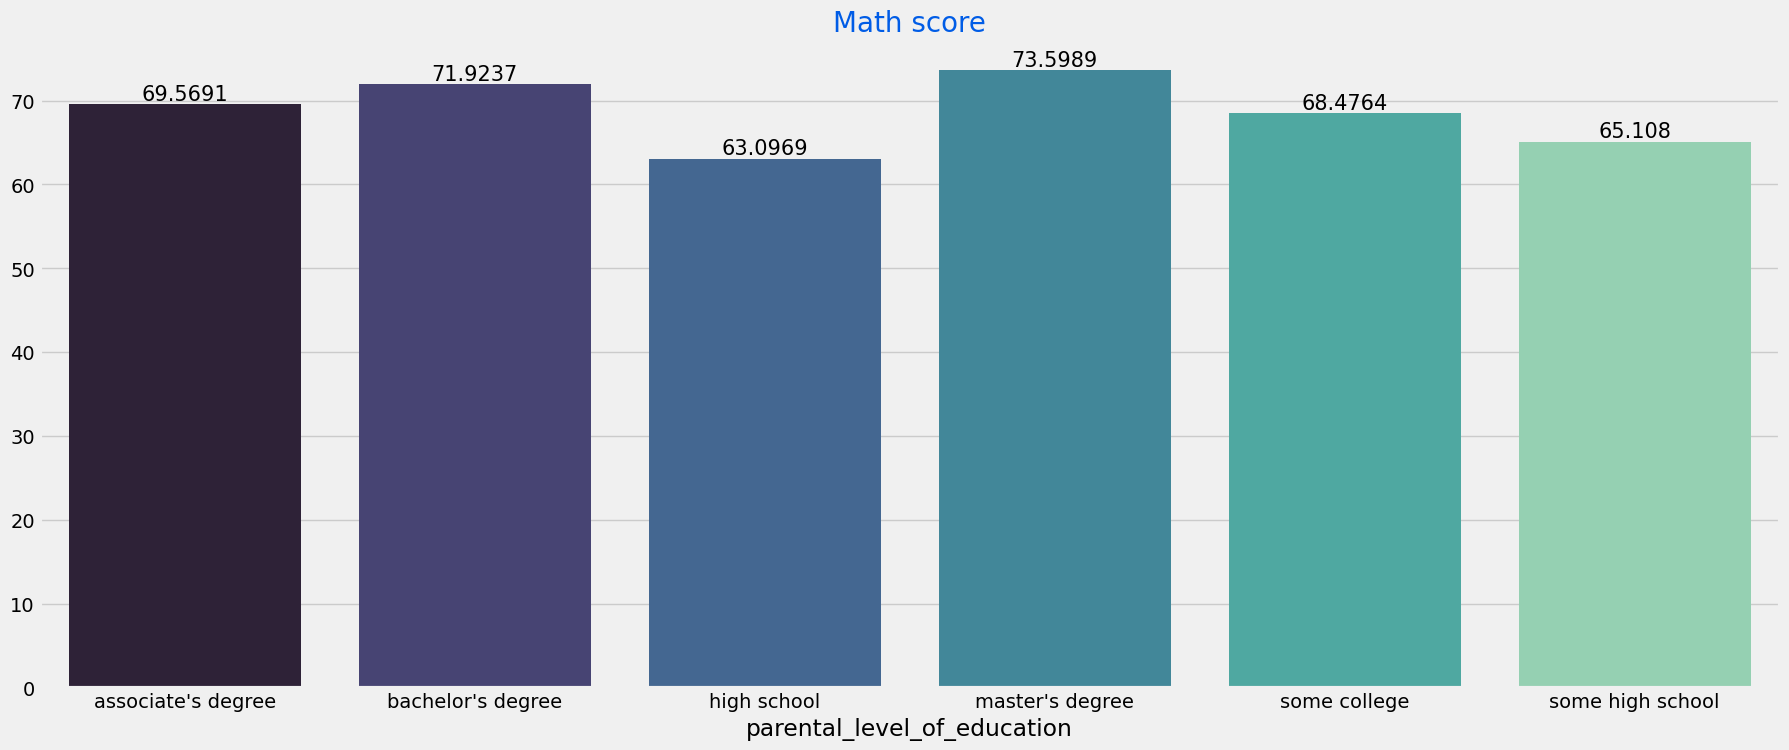

In [32]:
Group_data3=df.groupby('parental_level_of_education')
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(x=Group_data3['avg_score'].mean().index,y=Group_data3['avg_score'].mean().values,palette = 'mako')
ax.set_title('Math score',color='#005ce6',size=20)

for container in ax.containers:
    ax.bar_label(container,color='black',size=15)



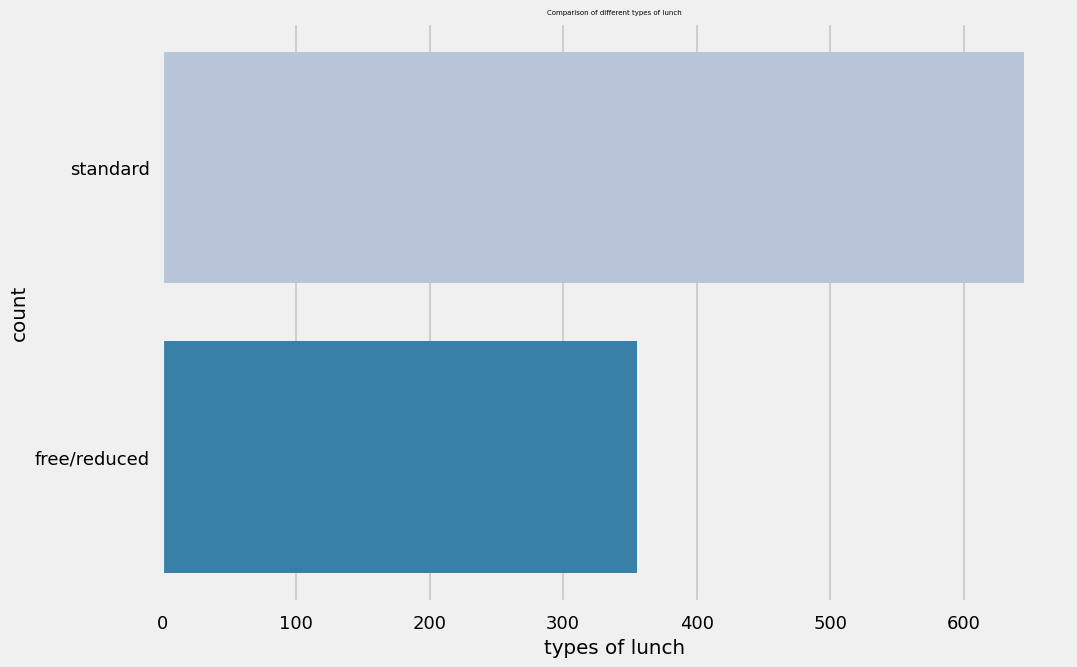

In [33]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 10, fontsize = 5)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

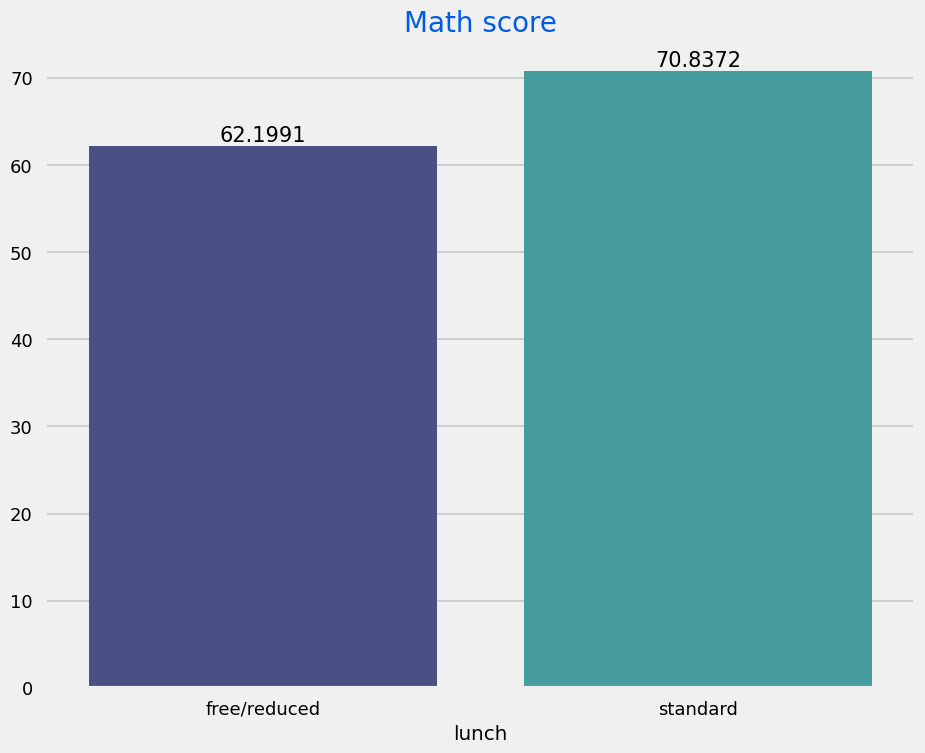

In [34]:
Group_data4=df.groupby('lunch')
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.barplot(x=Group_data4['avg_score'].mean().index,y=Group_data4['avg_score'].mean().values,palette = 'mako')
ax.set_title('Math score',color='#005ce6',size=20)

for container in ax.containers:
    ax.bar_label(container,color='black',size=15)

<Axes: xlabel='lunch', ylabel='math_score'>

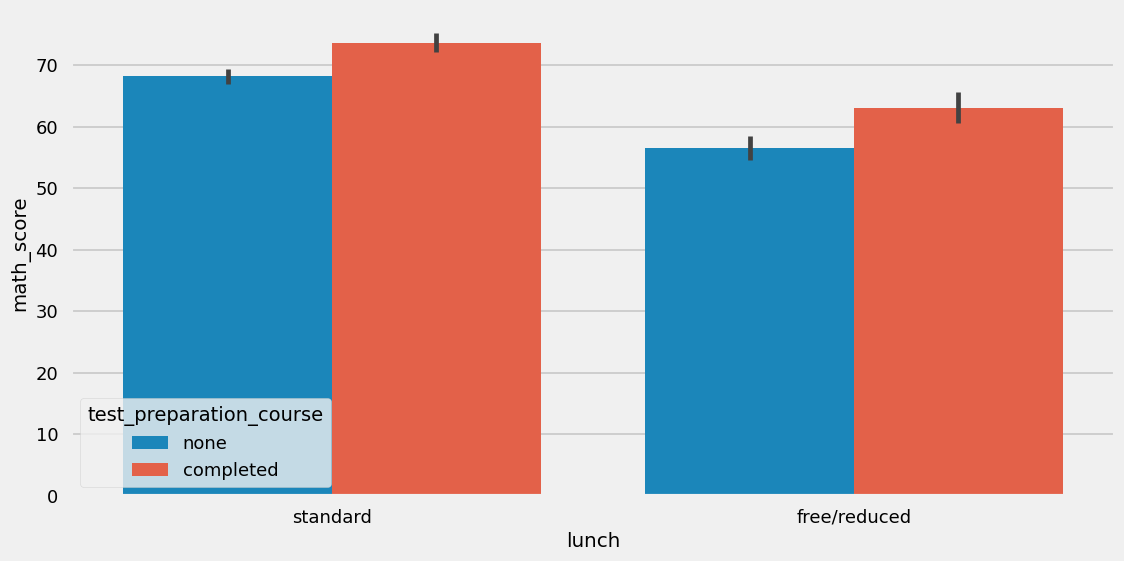

In [35]:
plt.figure(figsize=(12,6))

sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])


## Checking for Outliers

<Axes: ylabel='math_score'>

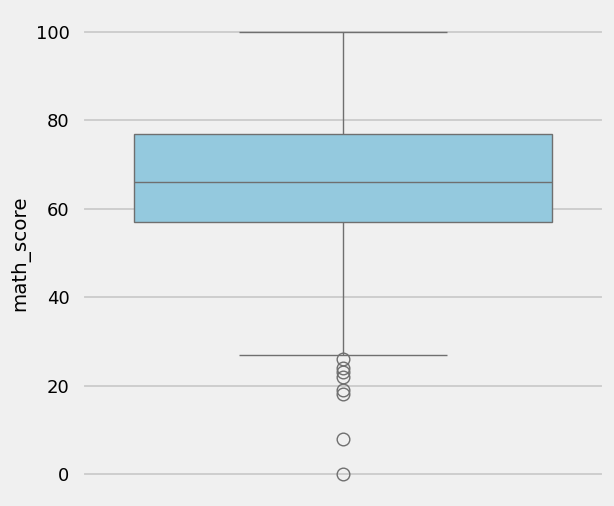

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(df['math_score'],color='skyblue',)

<Axes: ylabel='reading_score'>

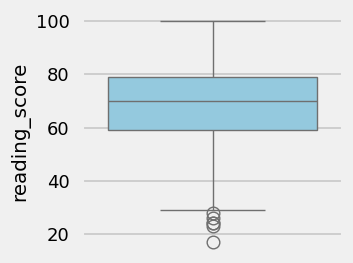

In [37]:
plt.figure(figsize=(3,3))
sns.boxplot(df['reading_score'],color='skyblue',)

<Axes: ylabel='writing_score'>

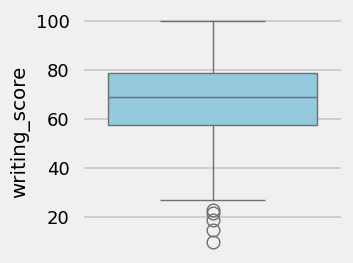

In [38]:
plt.figure(figsize=(3,3))
sns.boxplot(df['writing_score'],color='skyblue',)

No outlier in the data

# Conclusion

### 1) the data shows that student performance effected by variable like lunch , Race_enthencity and parent_level_education
### 2) the data shows that overall Female students performs better than Male students